In [51]:
#Trazendo os dados de vendas
import pandas as pd

sales = pd.read_csv('bases/data_base.csv')
print(sales)

            date                 datetime  ...  money    coffee_name
0     2024-03-01  2024-03-01 10:15:50.520  ...  38.70          Latte
1     2024-03-01  2024-03-01 12:19:22.539  ...  38.70  Hot Chocolate
2     2024-03-01  2024-03-01 12:20:18.089  ...  38.70  Hot Chocolate
3     2024-03-01  2024-03-01 13:46:33.006  ...  28.90      Americano
4     2024-03-01  2024-03-01 13:48:14.626  ...  38.70          Latte
...          ...                      ...  ...    ...            ...
3631  2025-03-23  2025-03-23 10:34:54.894  ...  35.76     Cappuccino
3632  2025-03-23  2025-03-23 14:43:37.362  ...  35.76          Cocoa
3633  2025-03-23  2025-03-23 14:44:16.864  ...  35.76          Cocoa
3634  2025-03-23  2025-03-23 15:47:28.723  ...  25.96      Americano
3635  2025-03-23  2025-03-23 18:11:38.635  ...  35.76          Latte

[3636 rows x 6 columns]


In [52]:
#Filtrando os dados
import warnings
warnings.filterwarnings("ignore")

sales = sales[["date", "coffee_name"]]
sales["date"] = pd.to_datetime(sales["date"])
sales = sales.groupby(sales["date"].dt.to_period('W'))["coffee_name"].count().reset_index(name="qtd")
sales["date"] = sales["date"].dt.strftime('%W/%Y')
sales.set_index("date", inplace=True)

display(sales)

,qtd
date,
09/2024,28
10/2024,53
11/2024,47
12/2024,38
13/2024,40
14/2024,42
15/2024,48
16/2024,53
17/2024,37


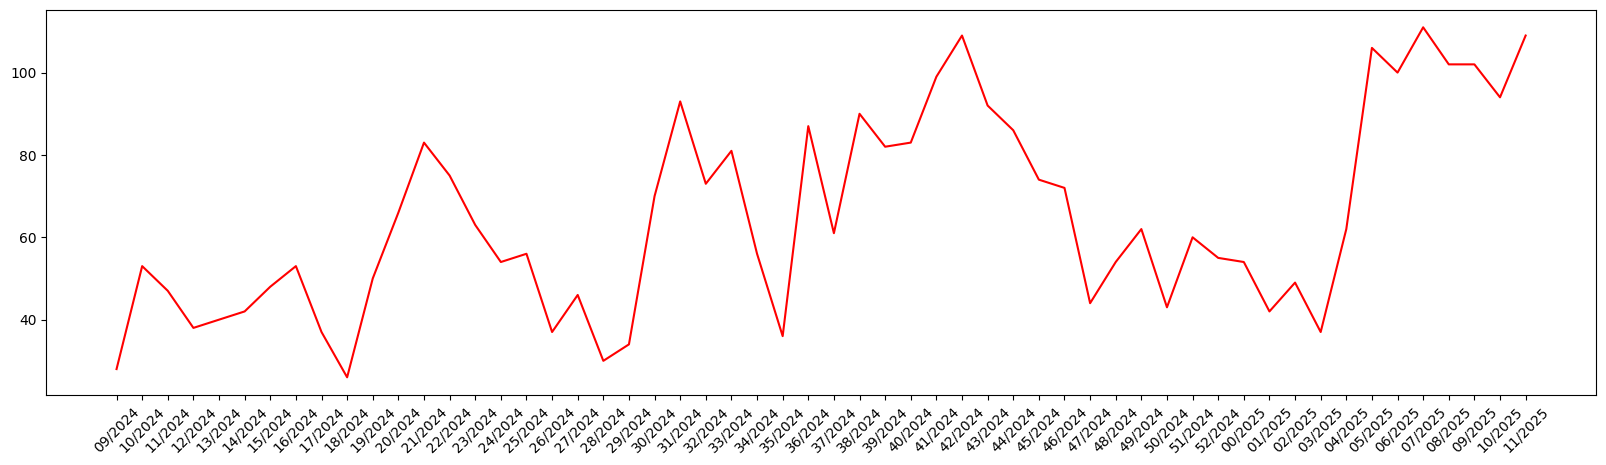

In [53]:
#Plotando dados
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(sales.index, sales.values, color='r', label="Sales")
plt.xticks(sales.index, rotation=45)
plt.show()


In [54]:
#testando estacionaridade
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(sales["qtd"])
print(test_result)

print(f'ADF Statistic: {test_result[0]}')
print(f'p-value: {test_result[1]}')


(np.float64(-2.7808910035505967), np.float64(0.06105562157499337), 0, 55, {'1%': np.float64(-3.5552728880540942), '5%': np.float64(-2.9157312396694217), '10%': np.float64(-2.5956695041322315)}, np.float64(378.2229424454654))
ADF Statistic: -2.7808910035505967
p-value: 0.06105562157499337


date
10/2024    25.0
11/2024    -6.0
12/2024    -9.0
13/2024     2.0
14/2024     2.0
15/2024     6.0
16/2024     5.0
17/2024   -16.0
18/2024   -11.0
19/2024    24.0
20/2024    16.0
21/2024    17.0
22/2024    -8.0
23/2024   -12.0
24/2024    -9.0
25/2024     2.0
26/2024   -19.0
27/2024     9.0
28/2024   -16.0
29/2024     4.0
30/2024    36.0
31/2024    23.0
32/2024   -20.0
33/2024     8.0
34/2024   -25.0
35/2024   -20.0
36/2024    51.0
37/2024   -26.0
38/2024    29.0
39/2024    -8.0
40/2024     1.0
41/2024    16.0
42/2024    10.0
43/2024   -17.0
44/2024    -6.0
45/2024   -12.0
46/2024    -2.0
47/2024   -28.0
48/2024    10.0
49/2024     8.0
50/2024   -19.0
51/2024    17.0
52/2024    -5.0
00/2025    -1.0
01/2025   -12.0
02/2025     7.0
03/2025   -12.0
04/2025    25.0
05/2025    44.0
06/2025    -6.0
07/2025    11.0
08/2025    -9.0
09/2025     0.0
10/2025    -8.0
11/2025    15.0
Name: qtd, dtype: float64


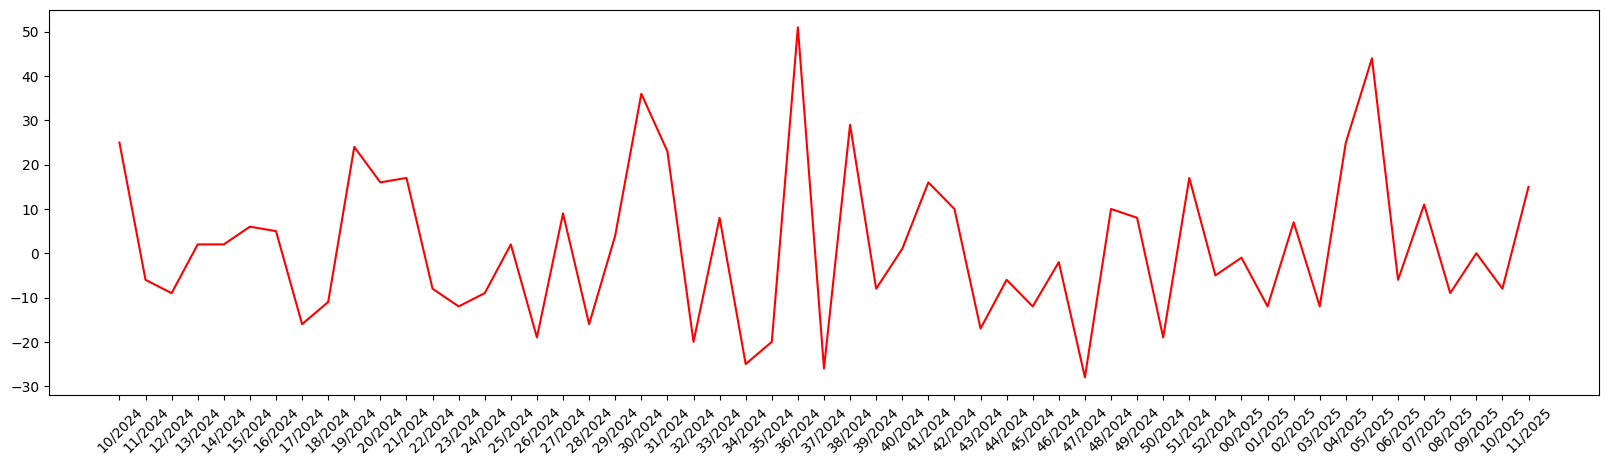

(np.float64(-8.841271631501128), np.float64(1.6659487069249e-14), 0, 54, {'1%': np.float64(-3.55770911573439), '5%': np.float64(-2.9167703434435808), '10%': np.float64(-2.59622219478738)}, np.float64(373.3441898602213))


In [55]:
#diferenciando e testando
test_diff = sales['qtd'].diff().dropna()

print(test_diff)
plt.figure(figsize=(20,5))
plt.plot(test_diff.index, test_diff.values, color='r', label="Sales")
plt.xticks(test_diff.index, rotation=45)
plt.show()
test_result_diff = adfuller(test_diff)

print(test_result_diff)

In [56]:
#Definindo modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                    qtd   No. Observations:                   56
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -233.048
Date:                Thu, 02 Oct 2025   AIC                            472.096
Time:                        20:30:51   BIC                            478.118
Sample:                             0   HQIC                           474.425
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6952      0.188      3.705      0.000       0.327       1.063
ma.L1         -0.9163      0.132     -6.953      0.000      -1.175      -0.658
sigma2       278.1529     49.811      5.584      0.0

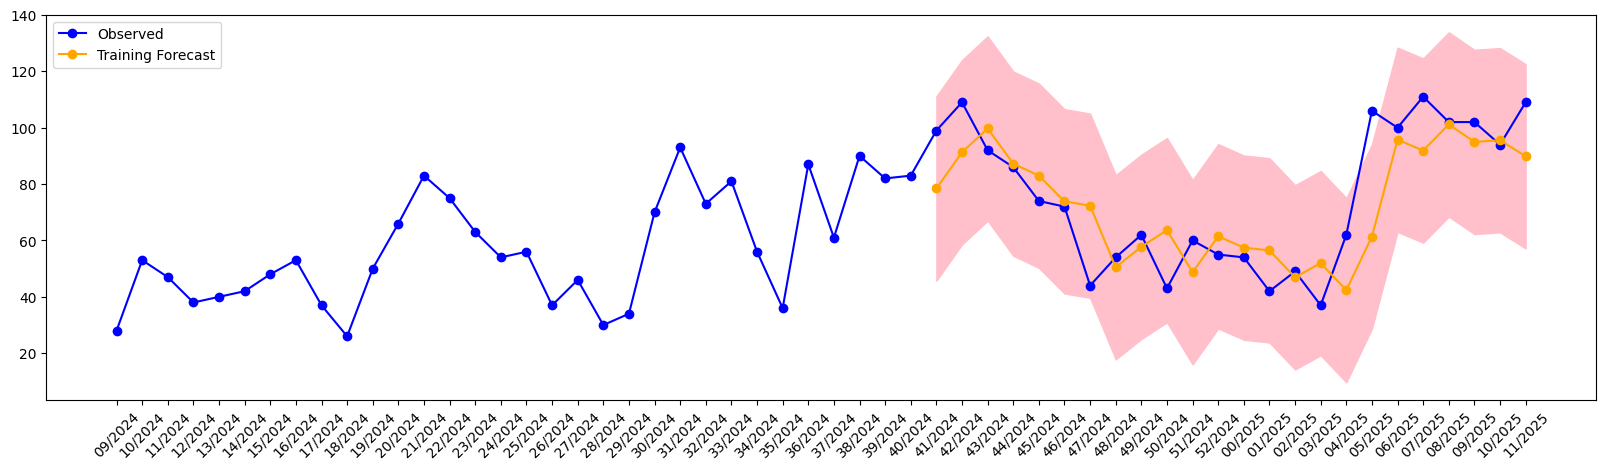

In [57]:
#Treinando Modelo e plotando

training = model_fit.get_prediction(start=-24, dynamic=False)
mean_training = training.predicted_mean
confiance_intervals = training.conf_int()

plt.figure(figsize=(20, 5))
plt.plot(sales.index, sales.values, color='blue', marker='o', label='Observed')
plt.plot(mean_training.index, mean_training.values, color='orange', marker='o', label='Training Forecast')
plt.fill_between(confiance_intervals.index, confiance_intervals.iloc[:,0], confiance_intervals.iloc[:,1], color='pink')
plt.xticks(sales.index, rotation=45)
plt.legend()
plt.show()
